In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

data_path = "/kaggle/input/porto-seguro-safe-driver-prediction/"
train = pd.read_csv(data_path + "train.csv", index_col='id')
test = pd.read_csv(data_path + "test.csv", index_col='id')
submission = pd.read_csv(data_path + "sample_submission.csv", index_col='id')

train.shape, test.shape

((595212, 58), (892816, 57))

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17

<AxesSubplot:>

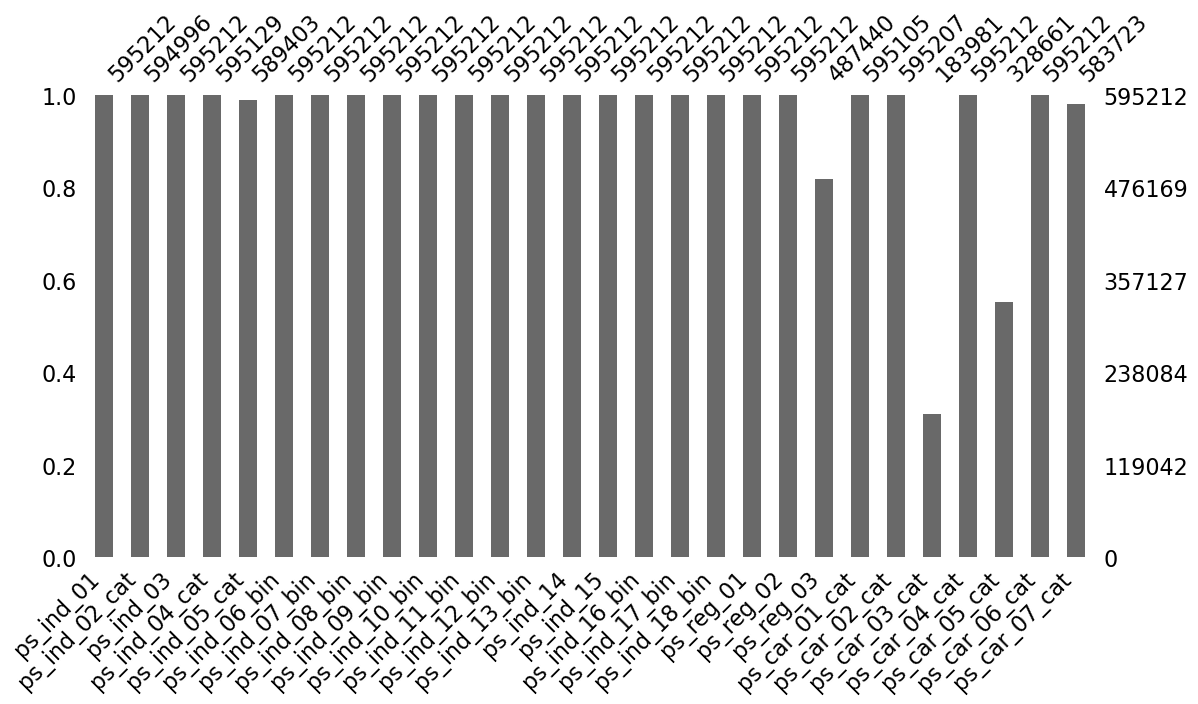

In [4]:
import missingno as msno

train_copy = train.copy().replace(-1,np.NaN)
msno.bar(df=train_copy.iloc[:, 1:29], figsize=(13, 6))

<AxesSubplot:>

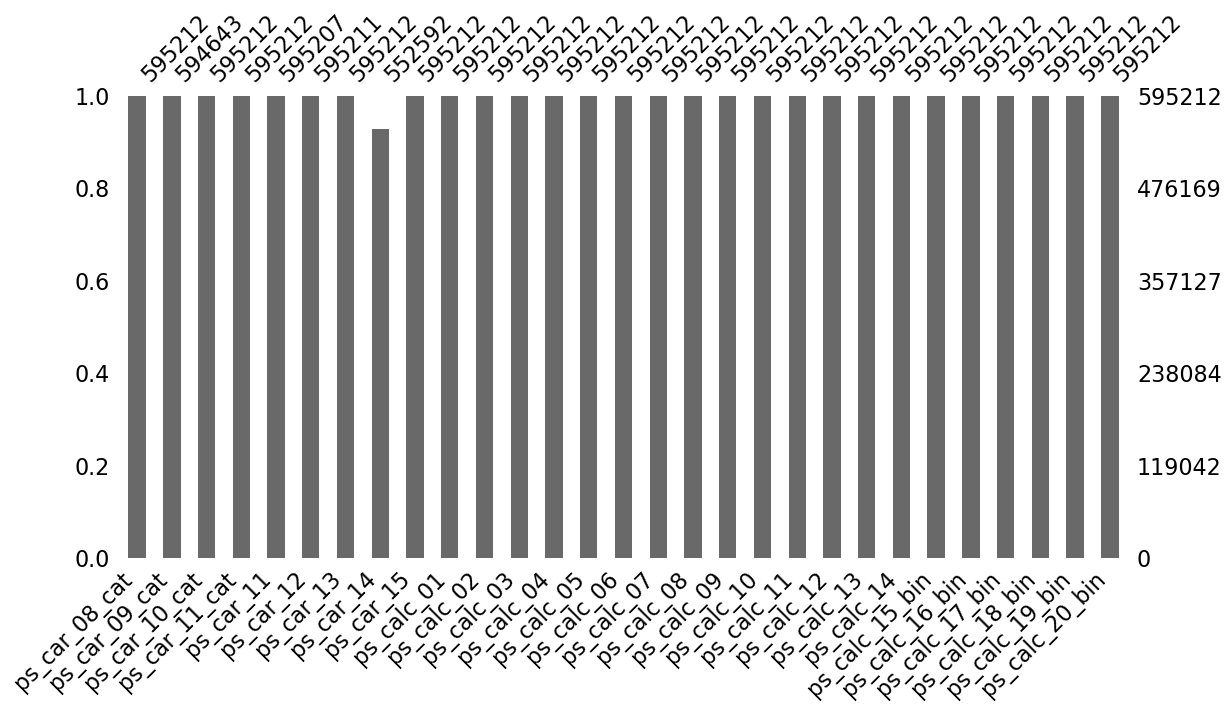

In [5]:
msno.bar(df=train_copy.iloc[:, 29:], figsize=(13, 6))

In [6]:
def resumetable(df):
    print(f'데이터셋 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary['결측값 개수'] = (df == -1).sum().values  #피처별 -1 개수
    summary['고윳값 개수'] = df.nunique().values
    summary['데이터 종류'] = None
    for col in df.columns:
        if 'bin' in col or col == 'target':
            summary.loc[col, '데이터 종류'] = '이진형'
        elif 'cat' in col:
            summary.loc[col, '데이터 종류'] = '명목형'
        elif df[col].dtype == float:
            summary.loc[col, '데이터 종류'] = '연속형'
        elif df[col].dtype == int:
            summary.loc[col, '데이터 종류'] = '순서형'
            
    return summary

summary = resumetable(train)
summary

데이터셋 형상: (595212, 58)


,데이터 타입,결측값 개수,고윳값 개수,데이터 종류
target,int64,0,2,이진형
ps_ind_01,int64,0,8,순서형
ps_ind_02_cat,int64,216,5,명목형
ps_ind_03,int64,0,12,순서형
ps_ind_04_cat,int64,83,3,명목형
ps_ind_05_cat,int64,5809,8,명목형
ps_ind_06_bin,int64,0,2,이진형
ps_ind_07_bin,int64,0,2,이진형
ps_ind_08_bin,int64,0,2,이진형
ps_ind_09_bin,int64,0,2,이진형


Text(0.5, 1.0, 'Target Distribution')

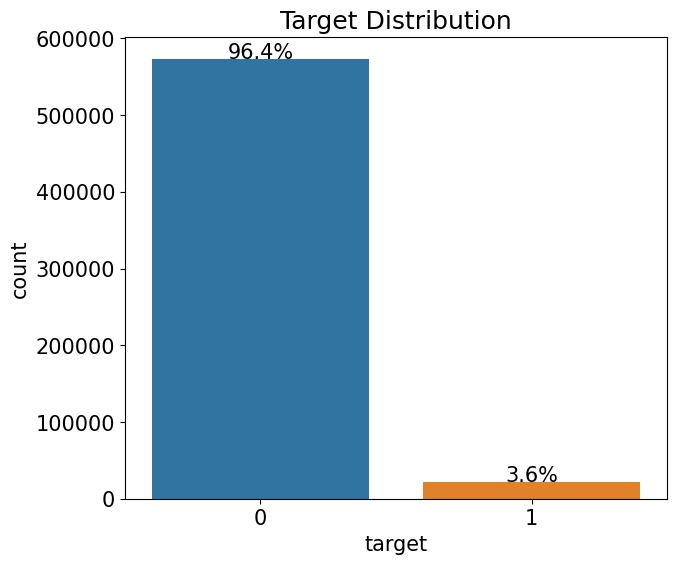

In [7]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

def write_percent(ax, total_size):
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()  #도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100  #타깃값 비율
        
        # (x, y) 좌표에 텍스트 입력
        ax.text(x = left_coord + width/2.0,
               y = height + total_size*0.001,
               s = f'{percent:1.1f}%',
               ha = 'center')
        
mpl.rc('font', size=15)
plt.figure(figsize=(7,6))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train))
ax.set_title('Target Distribution')

In [8]:
all_data = pd.concat([train, test], ignore_index=True)
all_data = all_data.drop('target', axis=1)
all_features = all_data.columns

from sklearn.preprocessing import OneHotEncoder

cat_features = [feature for feature in all_features if 'cat' in feature]

#원-핫 인코더 객체 생성
onehot_encoder = OneHotEncoder()
encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features])

drop_features = ['ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin',
                'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_14']

remaining_features = [feature for feature in all_features
                     if ('cat' not in feature and
                        'calc' not in feature and
                        feature not in drop_features)]

from scipy import sparse

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data[remaining_features]),
                              encoded_cat_matrix], format = 'csr')

num_train = len(train) #훈련 데이터 개수

#훈련 데이터와 테스트 데이터 나누기
X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target'].values

In [9]:
import numpy as np

def eval_gini(y_true, y_pred):
    assert y_true.shape == y_pred.shape
    
    n_samples = y_true.shape[0]
    L_mid = np.linspace(1/n_samples, 1, n_samples)
    
    pred_order = y_true[y_pred.argsort()]
    L_pred = np.cumsum(pred_order) / np.sum(pred_order)
    G_pred = np.sum(L_mid - L_pred)
    
    true_order = y_true[y_true.argsort()]
    L_true = np.cumsum(true_order) / np.sum(true_order)
    G_true = np.sum(L_mid - L_true)
    
    return G_pred / G_true

#for LightGBM
def gini(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds), True

In [11]:
from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits = 5, shuffle= True, random_state=1991)

params = {'objective':'binary',
         'learning_rate':0.01,
         'force_row_wise':True,
         'random_state':0}
oof_val_preds = np.zeros(X.shape[0])
oof_test_preds = np.zeros(X_test.shape[0])


In [12]:
import lightgbm as lgb

# OOF
for idx, (train_idx, valid_idx) in enumerate(folds.split(X,y)):
    print("#"*40, f'폴드{idx+1}/폴드{folds.n_splits}', '#'*40)
    
    #훈련용 데이터, 검증용 데이터 설정
    X_train, y_train = X[train_idx], y[train_idx] #훈련용 데이터
    X_valid, y_valid = X[valid_idx], y[valid_idx] #검증용 데이터
    
    #LightGBM 전용 데이터셋 생성
    dtrain = lgb.Dataset(X_train, y_train) #LightGBM 전용 훈련 데이터셋
    dvalid = lgb.Dataset(X_valid, y_valid) #LightGBM 전용 검증 데이터셋
    
    #LightGBM 모델 훈련
    lgb_model = lgb.train(params = params, #훈련용 하이퍼파라미터
                          train_set = dtrain, #훈련 데이터셋
                         num_boost_round = 1000, #부스팅 반복 횟수
                          valid_sets = dvalid, #성능 평가용 검증 데이터셋
                         feval = gini, #검증용 평가지표
                          early_stopping_rounds = 100, #조기종료 조건
                         verbose_eval = 100) #100번째마다 점수 출력
    
    
    oof_test_preds += lgb_model.predict(X_test)/folds.n_splits
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)
    
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드{idx+1} 지니계수: {gini_score}\n')

######################################## 폴드1/폴드5 ########################################


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1095
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.153354	valid_0's gini: 0.261651
[200]	valid_0's binary_logloss: 0.152426	valid_0's gini: 0.275704
[300]	valid_0's binary_logloss: 0.152023	valid_0's gini: 0.282277
[400]	valid_0's binary_logloss: 0.1518	valid_0's gini: 0.286648
[500]	valid_0's binary_logloss: 0.151713	valid_0's gini: 0.287944
[600]	valid_0's binary_logloss: 0.151672	valid_0's gini: 0.288637
[700]	valid_0's binary_logloss: 0.151659	valid_0's gini: 0.288939
Early stopping, best iteration is:
[681]	valid_0's binary_logloss: 0.151659	valid_0's gini: 0.289034
폴드1 지니계수: 0.2890336154188232

############

In [13]:
data_path = '/kaggle/input/porto-seguro-safe-driver-prediction/'

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

all_data = pd.concat([train, test], ignore_index = True)
all_data = all_data.drop('target', axis=1) #타깃값 제거

all_features = all_data.columns #전체 피처

from sklearn.preprocessing import OneHotEncoder

#명목형 피처
cat_features = [feature for feature in all_features if 'cat' in feature]

#원-핫 인코딩 적용
onehot_encoder = OneHotEncoder()
encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features])


#'데이터 하나당 결측값 개수'를 파생 피처로 추가하기
all_data['num_missing'] = (all_data==-1).sum(axis=1)

remaining_features = [feature for feature in all_features
                     if ('cat' not in feature and 'calc' not in feature)]

#num_missing을 remaining_features에 추가
remaining_features.append('num_missing')

ind_features = [feature for feature in all_features if 'ind' in feature]

is_first_feature = True
for ind_feature in ind_features:
    if is_first_feature:
        all_data['mix_ind'] = all_data[ind_feature].astype(str)+ '_'
        is_first_feature = False
    else:
        all_data['mix_ind'] += all_data[ind_feature].astype(str)+'_'
        
cat_count_features = []
for feature in cat_features +['mix_ind']:
    val_counts_dict = all_data[feature].value_counts().to_dict()
    all_data[f'{feature}_count'] = all_data[feature].apply(lambda x: val_counts_dict[x])
    
    cat_count_features.append(f'{feature}_count')

In [14]:
all_data_remaining = all_data[remaining_features + cat_count_features].drop(drop_features, axis=1)

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data_remaining),
                              encoded_cat_matrix], format = 'csr')

num_train = len(train) #훈련 데이터 개수

#훈련 데이터와 테스트 데이터 나누기
X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target'].values